In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# Data cleaning and preprocessing

In [2]:
df=pd.read_csv('StudentsPerformance[1].csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.shape

(1000, 8)

In [8]:
df.select_dtypes(include='number').skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

### The given data is clean data there is no null value or duplicated value in the data , so data is in a structured format also to give meaning full insigths 

# EDA (Visualization and Graphing)

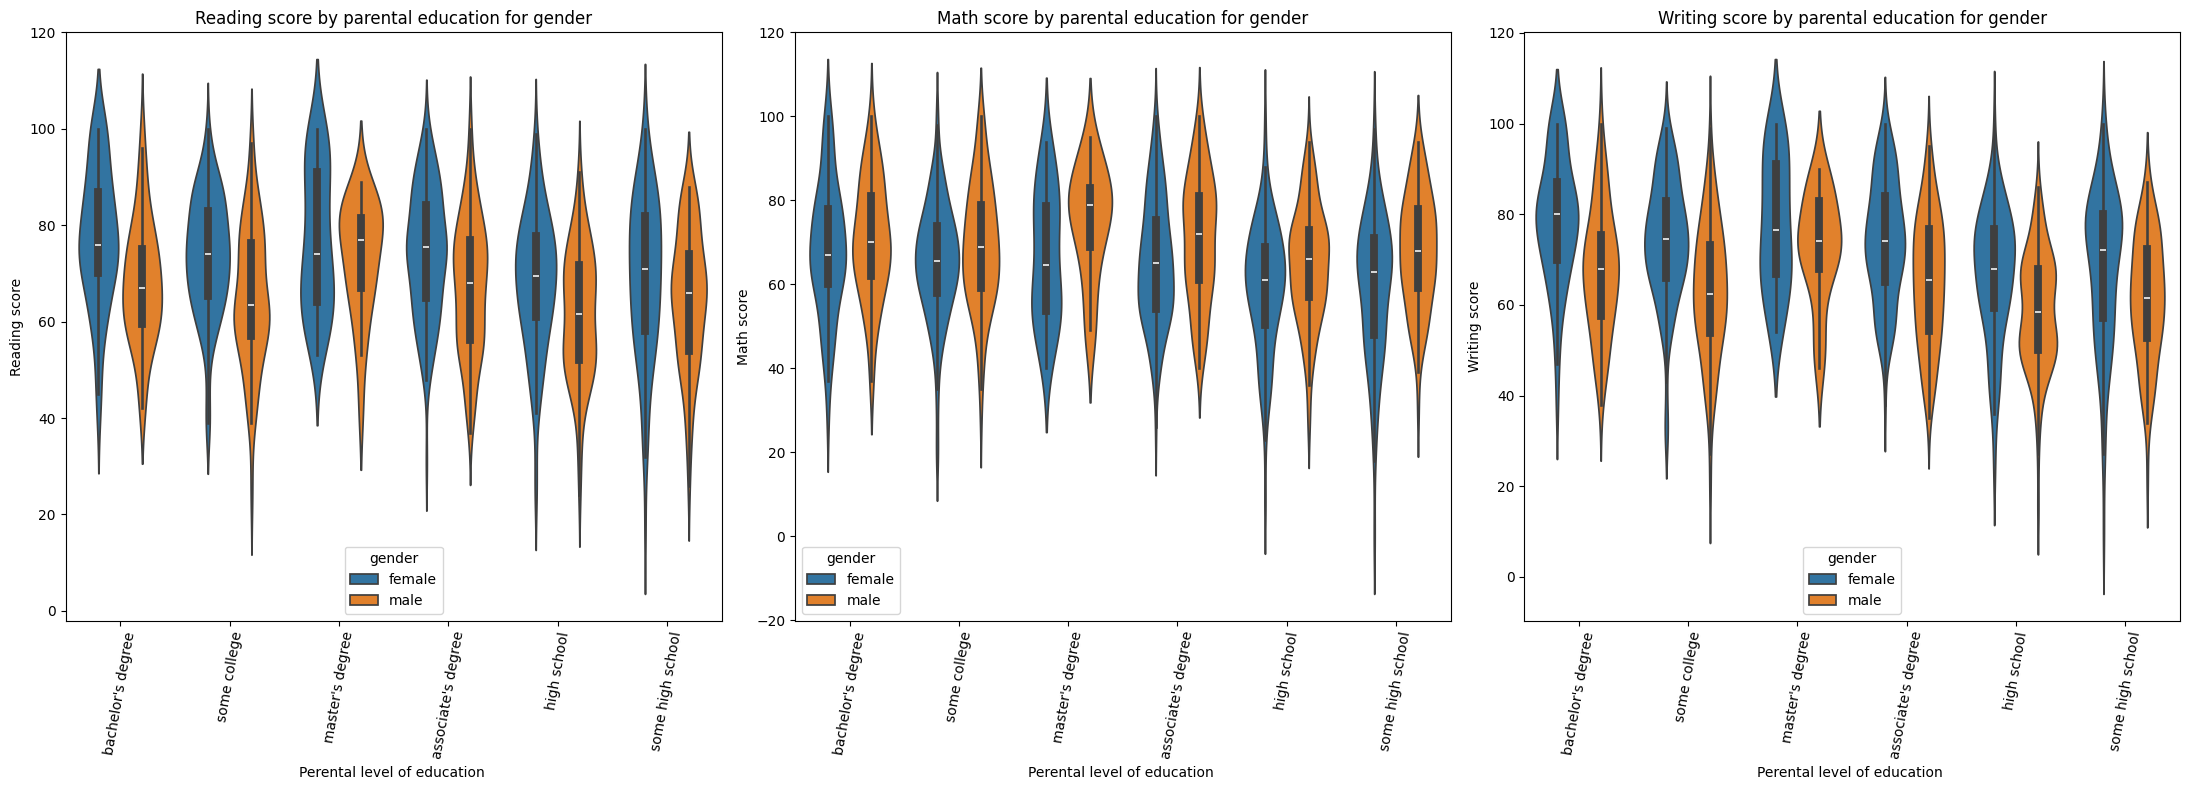

In [9]:
fig,axes=plt.subplots(1,3,figsize=(22,8))
sns.violinplot(data=df,x='parental level of education',y='reading score',hue='gender',ax=axes[0])
axes[0].set_title('Reading score by parental education for gender')
axes[0].set_xlabel('Perental level of education ')
axes[0].set_ylabel('Reading score')
sns.violinplot(data=df,x='parental level of education',y='math score',hue='gender',ax=axes[1])
axes[1].set_title('Math score by parental education for gender')
axes[1].set_xlabel('Perental level of education ')
axes[1].set_ylabel('Math score')
sns.violinplot(data=df,x='parental level of education',y='writing score',hue='gender',ax=axes[2])
axes[2].set_title('Writing score by parental education for gender')
axes[2].set_xlabel('Perental level of education ')
axes[2].set_ylabel('Writing score')
for ax in axes:
    ax.tick_params(axis='x',rotation=80)
plt.tight_layout()
plt.show()

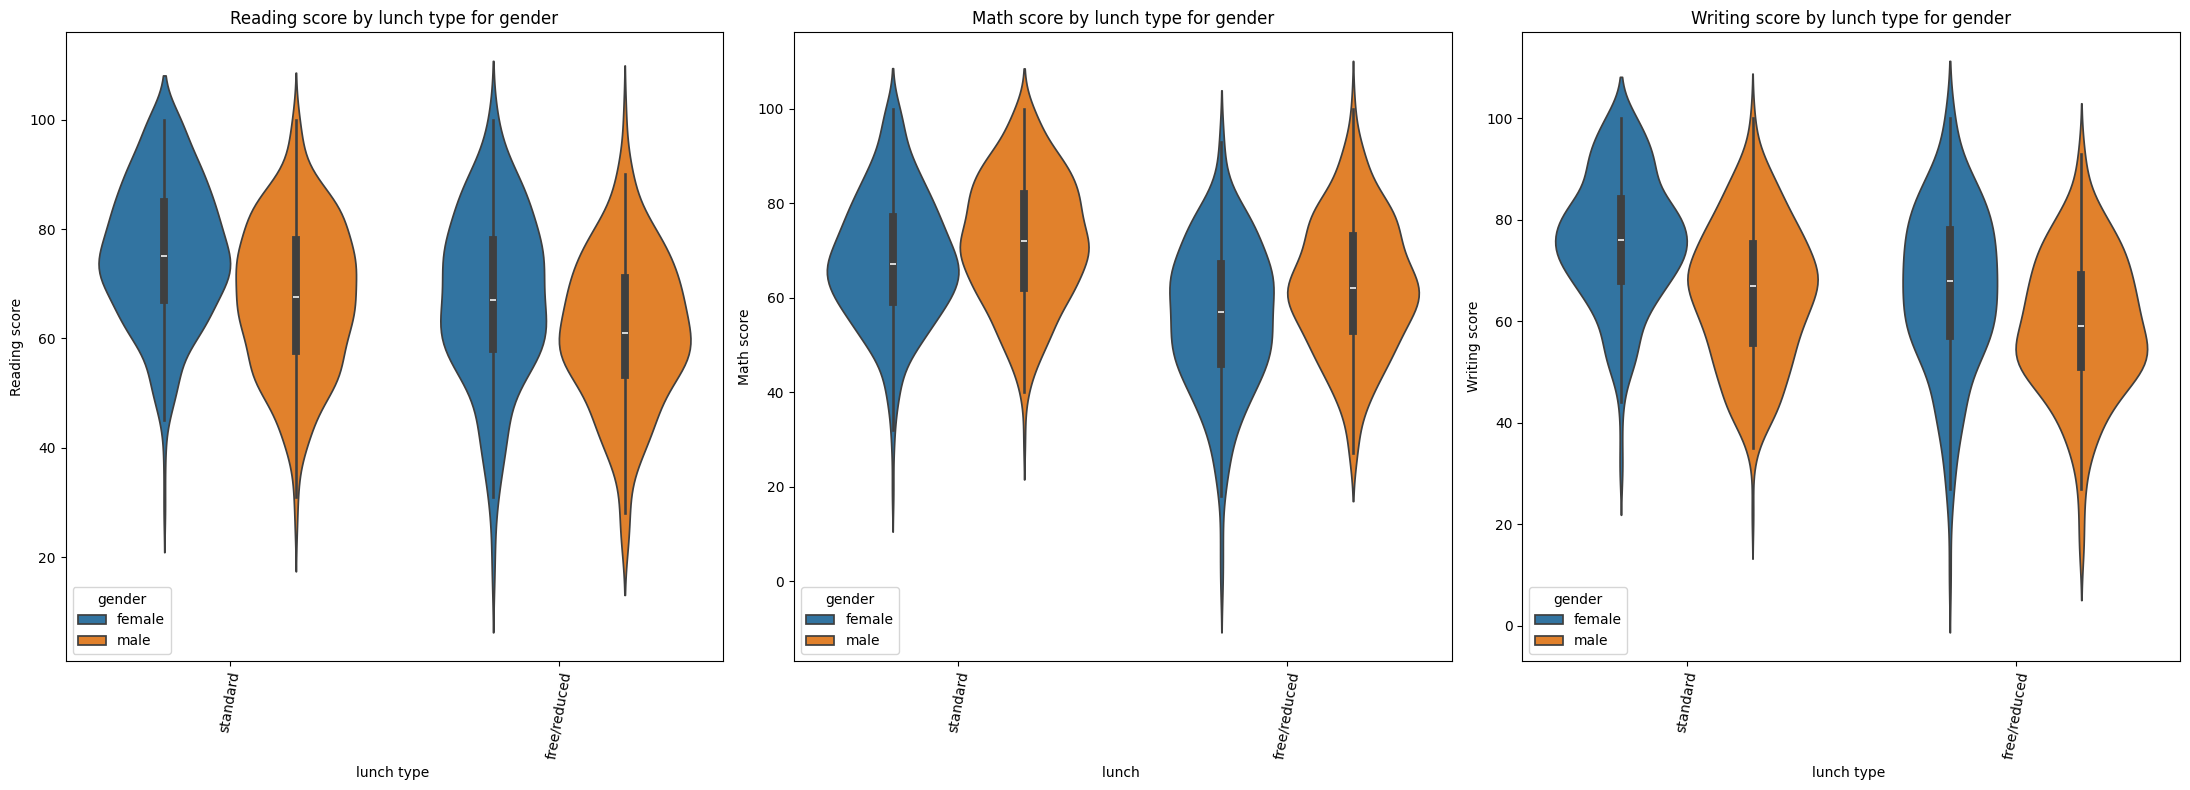

In [10]:
fig,axes=plt.subplots(1,3,figsize=(22,8))
sns.violinplot(data=df,x='lunch',y='reading score',hue='gender',ax=axes[0])
axes[0].set_title('Reading score by lunch type for gender')
axes[0].set_xlabel('lunch type ')
axes[0].set_ylabel('Reading score')
sns.violinplot(data=df,x='lunch',y='math score',hue='gender',ax=axes[1])
axes[1].set_title('Math score by lunch type for gender')
axes[1].set_xlabel('lunch ')
axes[1].set_ylabel('Math score')
sns.violinplot(data=df,x='lunch',y='writing score',hue='gender',ax=axes[2])
axes[2].set_title('Writing score by lunch type for gender')
axes[2].set_xlabel('lunch type ')
axes[2].set_ylabel('Writing score')
for ax in axes:
    ax.tick_params(axis='x',rotation=80)
plt.tight_layout()
plt.show()

In [11]:
df1=df.groupby(['race/ethnicity'])[['math score','reading score','writing score']].mean()
df1

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [12]:
df['lunch'].nunique()

2

In [13]:
df2=df['gender'].value_counts()
df2

gender
female    518
male      482
Name: count, dtype: int64

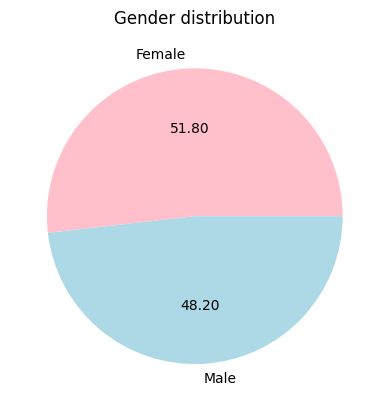

In [14]:
plt.pie(x=df2,labels=['Female','Male'],colors=['pink','lightblue'],autopct='%.2f')
plt.title('Gender distribution')
plt.show()

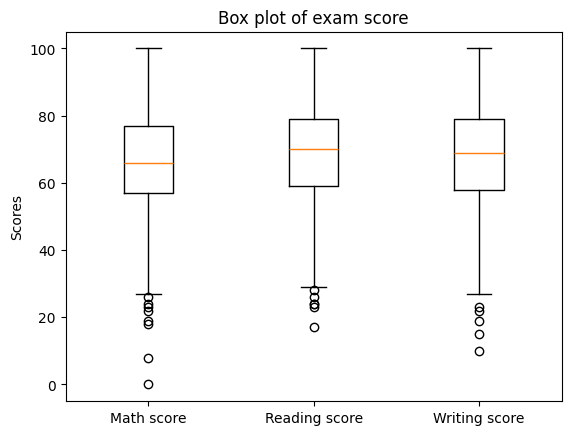

In [15]:
plt.boxplot([df['math score'],df['reading score'],df['writing score']],labels=['Math score','Reading score','Writing score'])
plt.title('Box plot of exam score')
plt.ylabel('Scores')
plt.show()

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df3=df.groupby(['test preparation course','gender'])[['math score','reading score','writing score']].mean()
df3

math score  reading score  writing score
test preparation course gender                                          
completed               female   67.195652      77.375000      78.793478
                        male     72.339080      70.212644      69.793103
none                    female   61.670659      69.982036      68.982036
                        male     66.688312      62.795455      59.649351

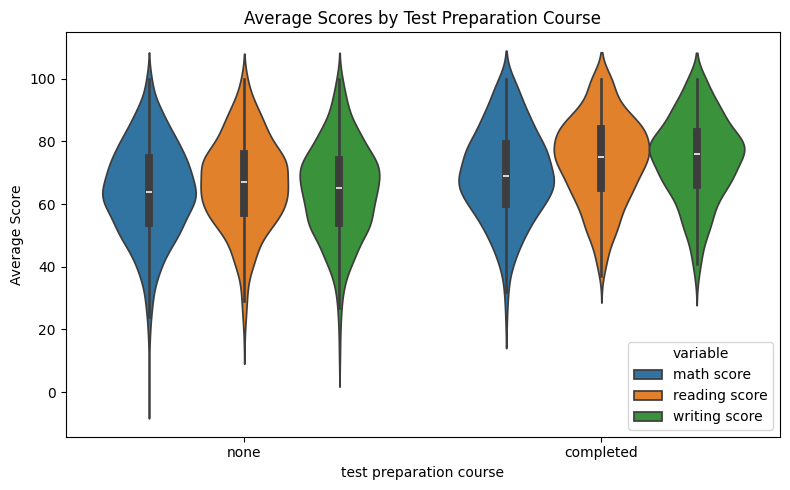

In [18]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df.melt(id_vars=['test preparation course'], value_vars=['math score', 'reading score', 'writing score']),
            x='test preparation course', y='value', hue='variable')
plt.title("Average Scores by Test Preparation Course")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()


In [19]:
df3=df.groupby(['lunch','gender'])[['math score','reading score','writing score']].mean()
df3

math score  reading score  writing score
lunch        gender                                          
free/reduced female   55.814815      67.386243      66.444444
             male     62.457831      61.542169      59.126506
standard     female   68.124620      75.607903      75.927052
             male     72.022152      67.537975      65.509494

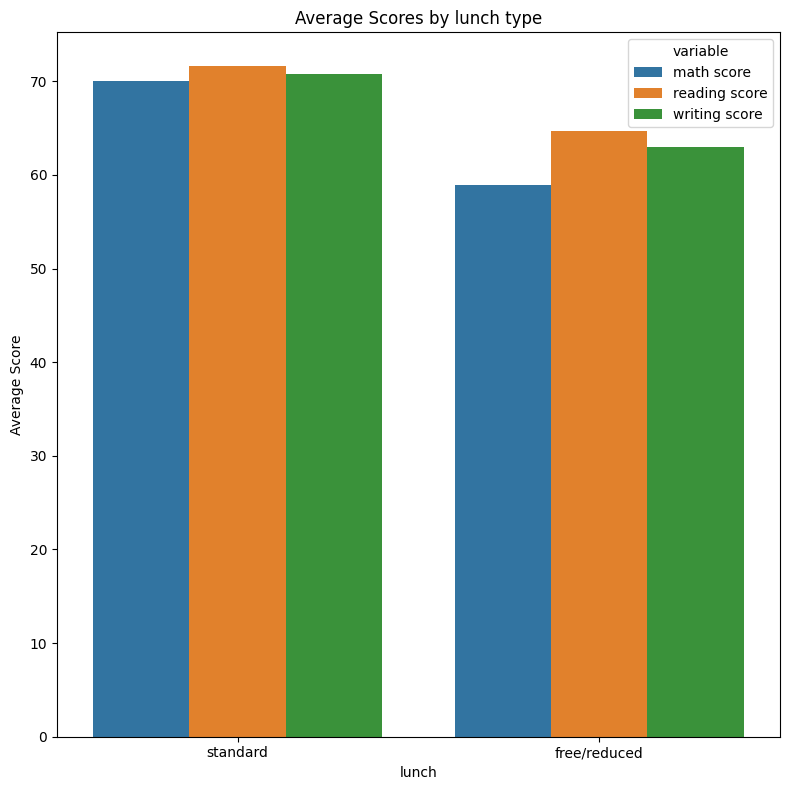

In [20]:
plt.figure(figsize=(8,8))
sns.barplot(data=df.melt(id_vars=['lunch'], value_vars=['math score', 'reading score', 'writing score']),
            x='lunch', y='value', hue='variable', ci=None)
plt.title("Average Scores by lunch type")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()

In [21]:
df4=df[['math score','reading score','writing score']].corr()
df4

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


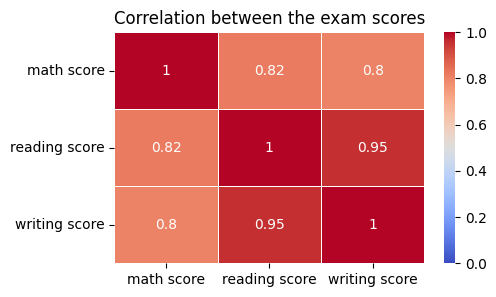

In [22]:
plt.figure(figsize=(5,3))
sns.heatmap(df4,annot=True,cmap='coolwarm',linewidth=0.5,vmin=0,vmax=1)
plt.title('Correlation between the exam scores')
plt.show()

In [23]:
df['Total Score']=df['math score']+df['writing score']+df['reading score']

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [25]:
df5=df.groupby(['gender','lunch','test preparation course'])['Total Score'].mean()
df5

gender  lunch         test preparation course
female  free/reduced  completed                  208.585714
                      none                       178.504202
        standard      completed                  232.438596
                      none                       212.883721
male    free/reduced  completed                  197.163934
                      none                       174.971429
        standard      completed                  220.539823
                      none                       196.458128
Name: Total Score, dtype: float64

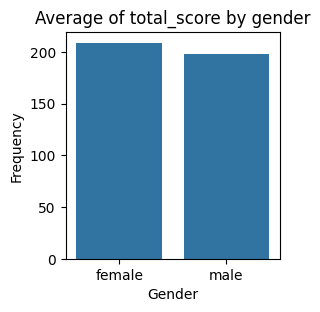

In [26]:
plt.figure(figsize=(3,3))
sns.barplot(data=df.melt(id_vars=['gender'], value_vars=['Total Score']),
            x='gender', y='value', ci=None)
plt.tight_layout()
plt.title('Average of total_score by gender')
plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.show()

# Meaningful insights from 

- Students whose partents level of education is bachelor's and master's have high score .
- In reading and writing generally female score higher than the male students.
- In math male students score higher than the female studnets.
- For parents with lower education level ,score are less in all  subjects ,It how the level of partents educatio affects children education .
- The studnets who are geting standard lunch type got higher marks than the students who are geting free or reduce lunche type. Luch type affect the student score.
- The students who are in group A got the less average marks in math than the students who are in group E.
- **The gender distributation in dataset**-- The female are more than the male , the percantage of female is *51.80* and for male is *48.20*.
- The range of score (from minimun to maximun) is largest math , some students got high value while others score very low.
- reading and writing have a slighlty more concentrated score distrubition near the top end .
- Math have some more outliers in low range that show students get low marks in math.
- Studnets who complete the test preparation course Get the higher marks in all subject compare to those who didnot complete it.
- This strongly suggests that completeing the test prep course is associate with high academic preformance.
- Reading and writing also improve but not as dramatically math because those students who haven't complete cousre got very low marks in maths.
- All three subjects are positively correlated , meaning students who score high in one subject tend to also score high in others.
- *0.95*(Reading and writing ) are stronglty realtionship , improving one is likely to improve other.
- Math correlation with ohter subjects is slightly low.
- The average of total marks of female is slightly higer than the male .

# Statistics

### Descriptive statistics

In [27]:
df['math score'].mean()

np.float64(66.089)

In [28]:
df['math score'].median()

np.float64(66.0)

In [29]:
df['math score'].mode()

0    65
Name: math score, dtype: int64

In [39]:
df['math score'].std()

np.float64(15.16308009600945)

In [30]:
df['writing score'].mean()

np.float64(68.054)

In [31]:
df['writing score'].mode()

0    74
Name: writing score, dtype: int64

In [32]:
df['writing score'].median()

np.float64(69.0)

In [40]:
df['writing score'].std()

np.float64(15.19565701086965)

In [37]:
df['reading score'].mean()

np.float64(69.169)

In [38]:
df['reading score'].mode()

0    72
Name: reading score, dtype: int64

In [35]:
df['reading score'].median()

np.float64(70.0)

In [41]:
df['reading score'].std()

np.float64(14.600191937252216)

In [65]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

#### CHI-SQUARE TEST BASED ON TEST_PREPARATION_COURSE

In [45]:
contingency_table=pd.crosstab(df['gender'],df['test preparation course'])
print('Contingency_table')
print(contingency_table)

Contingency_table
test preparation course  completed  none
gender                                  
female                         184   334
male                           174   308


In [54]:
chi2,p,dof,expected=chi2_contingency(contingency_table)
print("Chi square : ",chi2)
print("P-value : ",p)
print("Degree of freedom : ",dof)
print("Expected frequency : " , expected)

Chi square :  0.015529201882465888
P-value :  0.9008273880804724
Degree of freedom :  1
Expected frequency :  [[185.444 332.556]
 [172.556 309.444]]


In [51]:
alpha=0.05
if p<alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


### ONE WAY ANOVA TEST 

In [56]:
grouped=df.groupby('parental level of education')['math score'].apply(list)
grouped

parental level of education
associate's degree    [47, 71, 58, 40, 54, 81, 74, 75, 57, 55, 58, 5...
bachelor's degree     [72, 74, 67, 79, 80, 65, 65, 68, 99, 75, 78, 7...
high school           [64, 38, 65, 88, 66, 70, 66, 82, 88, 33, 49, 4...
master's degree       [90, 50, 46, 73, 62, 56, 62, 87, 82, 89, 49, 8...
some college          [69, 76, 88, 40, 78, 65, 44, 69, 69, 63, 40, 9...
some high school      [69, 18, 69, 50, 71, 0, 39, 59, 67, 45, 61, 49...
Name: math score, dtype: object

In [60]:
anova_test=f_oneway(*grouped)
print("ANOVA F-statistic : ",anova_test.statistic)
print("p-value : ", anova_test.pvalue)

ANOVA F-statistic :  6.521582600453218
p-value :  5.592272384107223e-06


In [61]:
alpha=0.05
if anova_test.pvalue<alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


### T-TEST 

In [63]:
male_score_math=df[df['gender']=='male']['math score']
female_score_math=df[df['gender']=='female']['math score']

In [67]:
t_stat,p_value=ttest_ind(male_score_math,female_score_math)
print("T-Test : ",t_stat)
print("P-value : ",p_value)

T-Test :  5.383245869828983
P-value :  9.120185549328822e-08


In [68]:
alpha=0.05
if p_value<alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis
